In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

import seaborn as sb

import os
import sys
from IPython.display import Image

#### What is Churn Rate?

Accordinng to Investopedia: 
The churn rate is the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period. For a company to expand its clientele, its growth rate, as measured by the number of new customers, must exceed its churn rate. This rate is generally expressed as a percentage.

The churn rate is also known as the rate of attrition.

Read more: Churn Rate https://www.investopedia.com/terms/c/churnrate.asp#ixzz5WaKq2GIt 
Follow us: Investopedia on Facebook

### Import dataset

In [2]:
telecom_data = pd.read_csv('data/telecom_churn.csv')

In [3]:
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The column "Churn" marks whether a Customer left the Network or stayed. If Churn is True then the Customer left the Telecom Network.

In [4]:
telecom_data.shape

(3333, 20)

There are 3333 Customers in the dataset.

In [5]:
telecom_data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

#### Describe method shows the statistical characteristics of the columns.

In [6]:
telecom_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
telecom_data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

2850 Customers out of 3333 stayed in the network and 483 left the Telecom network.

#### In terms of percentage:

In [8]:
round(telecom_data['Churn'].value_counts(normalize = True) * 100, 2)

False    85.51
True     14.49
Name: Churn, dtype: float64

Churn Rate is 14.5% for this Telecom operator. This also makes the dataset skewed as the observations for Churn Rate as True as very small compared to Churn Rate as False.

#### Converting 'International plan' and 'Voice mail plan' into Boolean variables.

In [9]:
convert_dict = {'No' : False, 'Yes' : True}
telecom_data['International plan'] = telecom_data['International plan'].map(convert_dict)
telecom_data['Voice mail plan'] = telecom_data['Voice mail plan'].map(convert_dict)
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Let's apply a group by on Churn Rate and observe the behavior of some input features:

First, let us look at the number of calls/minutes of call made throughtout the day.

In [10]:
telecom_data.groupby(by = ['Churn'])['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls'].agg([np.mean, np.std, np.min, np.max])

Total day calls                      Total eve calls                  \
                 mean        std amin amax            mean        std amin   
Churn                                                                        
False      100.283158  19.801157    0  163      100.038596  19.958414    0   
True       101.335404  21.582307    0  165      100.561077  19.724711   48   

           Total night calls                      Total intl calls            \
      amax              mean        std amin amax             mean       std   
Churn                                                                          
False  170        100.058246  19.506246   33  175         4.532982  2.441984   
True   168        100.399586  19.950659   49  158         4.163561  2.551575   

                 
      amin amax  
Churn            
False    0   19  
True     1   20

Churn Rate doesn't show a lot of difference in these metrics.

In [11]:
telecom_data.groupby(by = ['Churn'])['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
False        175.175754  50.181655  0.0  315.6        199.043298  50.292175   
True         206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          \
       amin   amax                mean        std  amin   amax   
Churn                                                            
False   0.0  361.8          200.133193  51.105032  23.2  395.0   
True   70.9  363.7          205.231677  47.132825  47.4  354.9   

      Total intl minutes                       
                    mean       std amin  amax  
Churn                                          
False          10.158877  2.784489  0.0  18.9  
True           10.700000  2.793190  2.0  20.0

Customers who left the network were using the network more often on average than the Customers who haven't left.

### Statewise Churn Rate

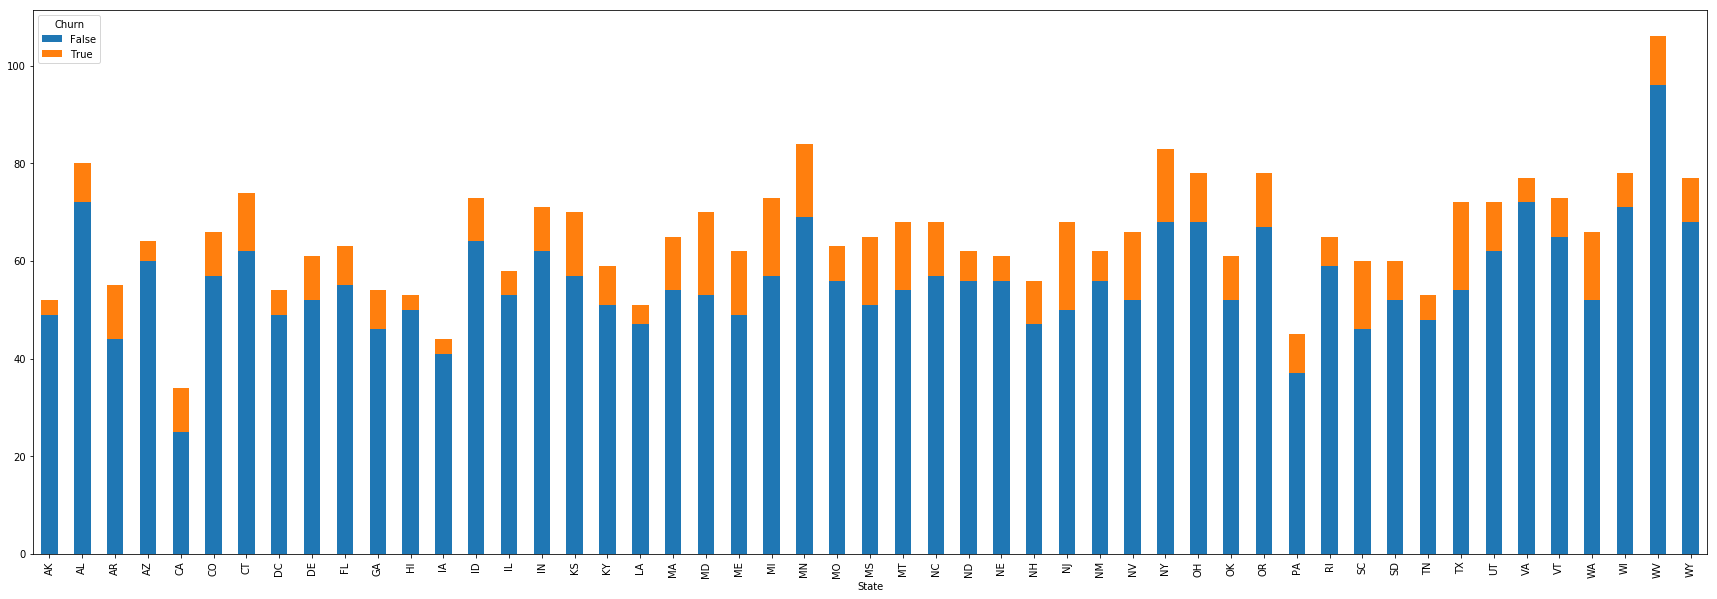

In [12]:
telecom_data.groupby(by = ['State'])['Churn'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

### Area Code vs Churn Rate

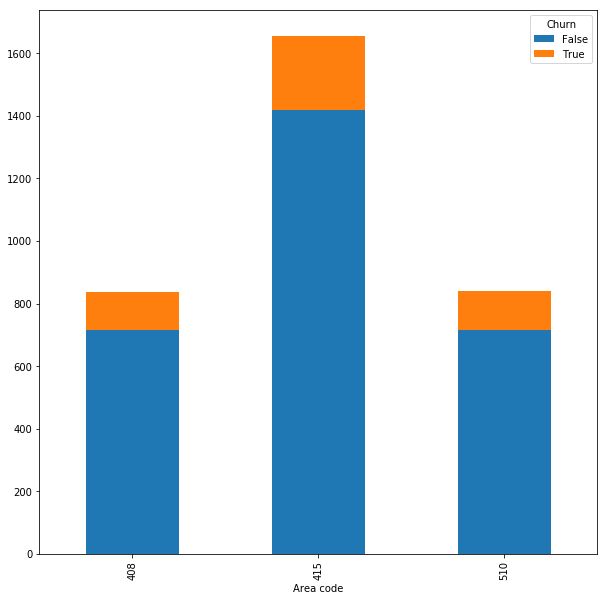

In [13]:
telecom_data.groupby(by = ['Area code'])['Churn'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,10))

### Account length vs Churn Rate

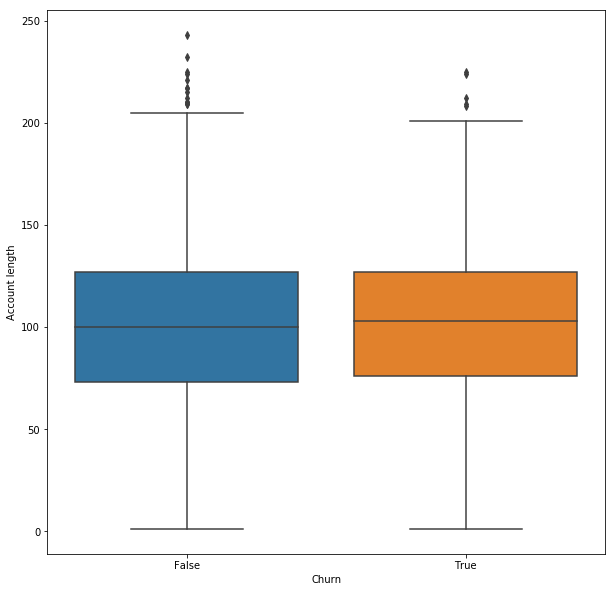

In [14]:
plt.figure(figsize=(10, 10))
sb.boxplot(data = telecom_data, x = 'Churn', y = 'Account length')

### International plan vs Churn Rate

In [15]:
pd.crosstab(telecom_data['Churn'], telecom_data['International plan'])

International plan,False,True
Churn,,
False,2664,186
True,346,137


International plan seems to have a significant effect on the Churn Rate for this Telecom operator.

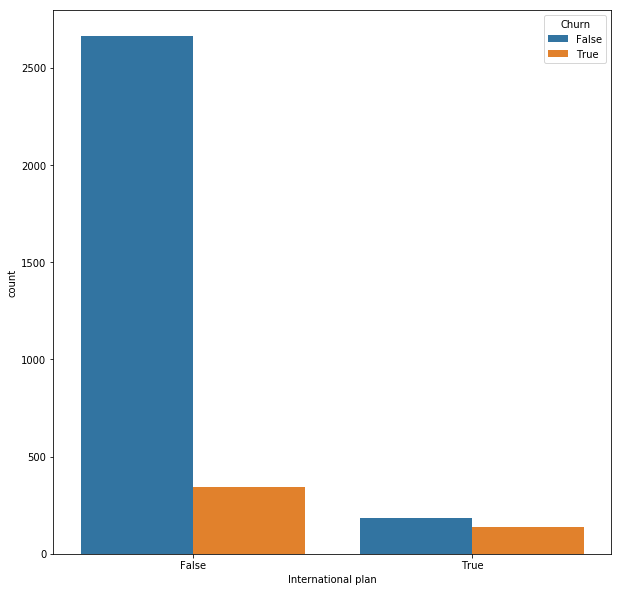

In [16]:
plt.figure(figsize=(10, 10))
sb.countplot(data = telecom_data, x = 'International plan', hue = 'Churn')

When Customers have opted for an International Plan the Churn Rate is higher.

### Voice mail plan vs Churn Rate

In [17]:
pd.crosstab(telecom_data['Churn'], telecom_data['Voice mail plan'])

Voice mail plan,False,True
Churn,,
False,2008,842
True,403,80


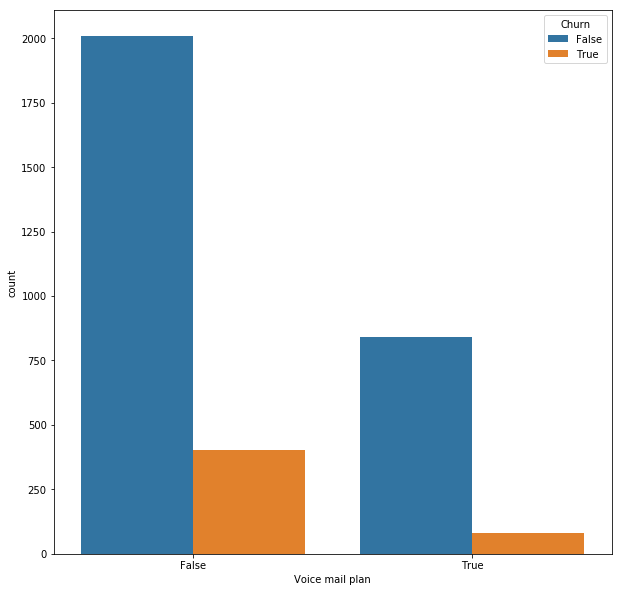

In [18]:
plt.figure(figsize=(10, 10))
sb.countplot(data = telecom_data, x = 'Voice mail plan', hue = 'Churn')

Most of the Customers who left the Telecom network use either of these additional services.

### Customer service calls vs Churn Rate

In [19]:
pd.crosstab(telecom_data['Churn'], telecom_data['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2


As the number of Customer Service calls are increasing the Churn Rate is increasing.

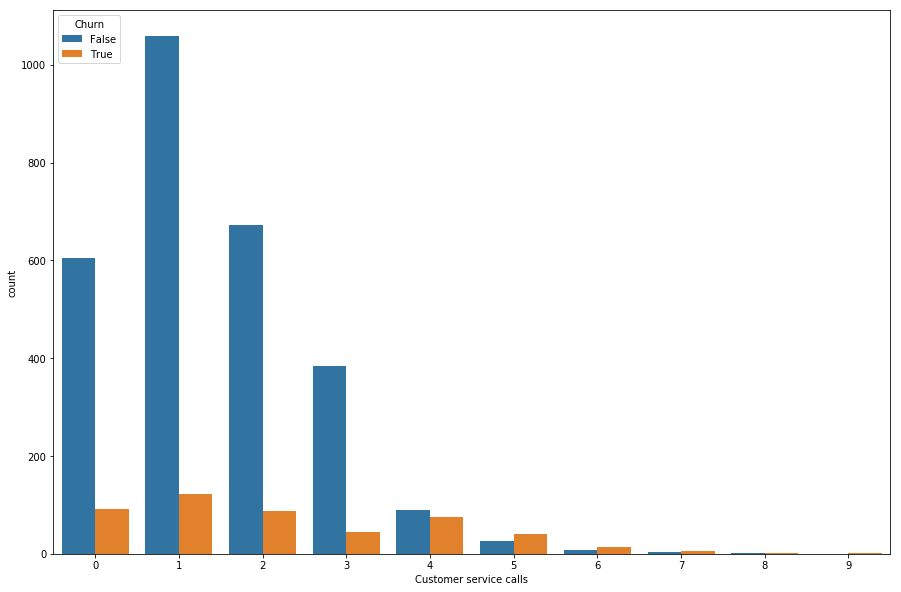

In [20]:
plt.figure(figsize=(15, 10))
sb.countplot(x = 'Customer service calls', hue = 'Churn', data = telecom_data)

### Getting ready for ML algorithms

#### Label Encoding 
Converting Boolean and Object columns to values to integer values for each category.

In [21]:
telecom_data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan           bool
Voice mail plan              bool
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

telecom_data_encoder = LabelEncoder()

for col in telecom_data.columns:
    if telecom_data[col].dtype == 'object' or telecom_data[col].dtype == 'bool':
        telecom_data_encoder.fit(telecom_data[col])
        print(telecom_data_encoder.classes_)
        telecom_data[col] = telecom_data_encoder.transform(telecom_data[col])

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE'
 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT'
 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
[False  True]
[False  True]
[False  True]


In [23]:
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### One Hot Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder

telecom_data_encoder = OneHotEncoder()

for col in telecom_data.columns:
    if col in ['State', 'Area code', 'International plan', 'Voice mail plan']:
        temp_cols = telecom_data_encoder.fit_transform(telecom_data[col].reshape(-1,1))
        temp_df = pd.DataFrame(temp_cols.toarray()[:, :-1], columns= [col + '_ ' + str(int(i)) for i in range(temp_cols.shape[1] - 1)])
        telecom_data = pd.concat([telecom_data, temp_df], axis = 1)
        telecom_data.drop(col, axis=1, inplace=True)

C:\Users\Ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [25]:
telecom_data.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_ 44,State_ 45,State_ 46,State_ 47,State_ 48,State_ 49,Area code_ 0,Area code_ 1,International plan_ 0,Voice mail plan_ 0
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Correlation Plot

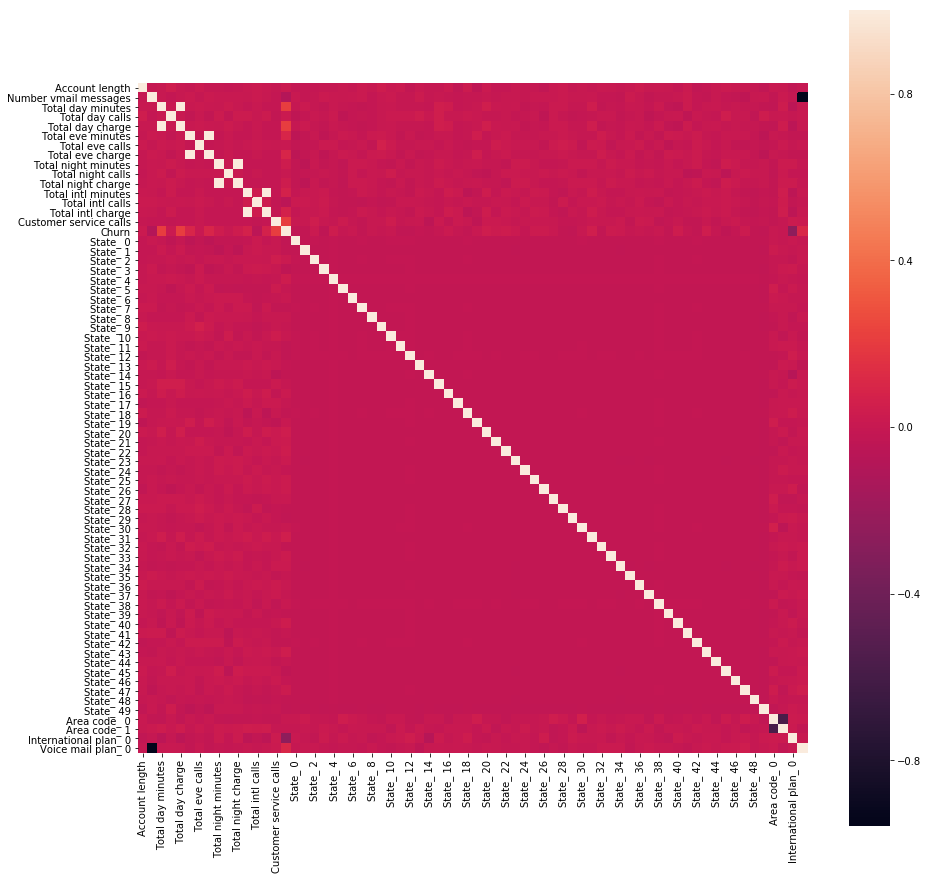

In [26]:
corrmat = telecom_data.corr(method='pearson')
plt.figure(figsize=(15, 15))
sb.heatmap(corrmat, square=True, vmax=1.0)

#### Feature Importance by XGBClassifier

In [27]:
import xgboost as xgb

In [28]:
X = telecom_data.copy()
X.drop('Churn', axis = 1, inplace=True)
y = telecom_data['Churn']

In [29]:
X.shape, y.shape

((3333, 69), (3333,))

In [30]:
clf_features = xgb.XGBClassifier(max_depth=7, n_estimators=300, colsample_bylevel=0.85, colsample_bytree=0.85, subsample=0.85, 
                                 learning_rate=0.1, n_jobs = -1)
clf_features.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
       colsample_bytree=0.85, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.85)

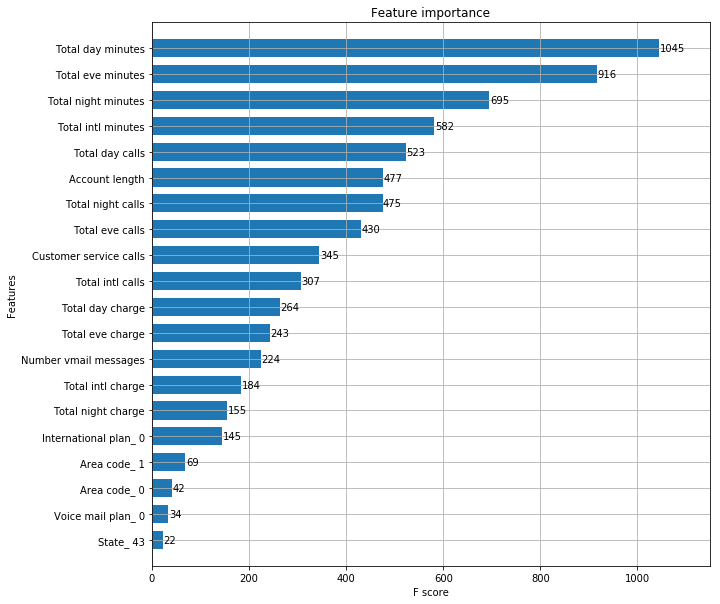

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(clf_features, max_num_features= 20 , height = 0.7, ax = ax)

#### Train - Test split

In [32]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 100)

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2666, 69), (2666,), (667, 69), (667,))

#### Feature Selection

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,roc_auc_score

thresholds = np.sort(clf_features.feature_importances_)

for thresh in thresholds:
    selection = SelectFromModel(clf_features, threshold = thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Threshold = %.3f, n = %d, Accuracy = %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold = 0.000, n = 69, Accuracy = 95.50%
Threshold 

We can see that Threshold of 0.001 works the best here.

In [35]:
selection = SelectFromModel(clf_features, threshold = 0.001, prefit=True)
selected_columns = X_train.columns[selection.get_support()]
X_train = pd.DataFrame(selection.transform(X_train), columns = selected_columns)
X_test = pd.DataFrame(selection.transform(X_test), columns = selected_columns)

In [36]:
clf_XGB = xgb.XGBClassifier(max_depth=7, n_estimators=300, colsample_bylevel=0.85, colsample_bytree=0.85, subsample=0.85, 
                                 learning_rate=0.1, n_jobs = -1)
clf_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
       colsample_bytree=0.85, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.85)

In [37]:
clf_XGB_predicted = clf_XGB.predict(X_test)

In [38]:
print("Accuracy on Test Set: "+ str(round(accuracy_score(y_test, clf_XGB_predicted), 4) * 100) + ' %')

Accuracy on Test Set: 95.95 %


In [39]:
print('AUC: ', str(roc_auc_score(y_test, clf_XGB_predicted)))

AUC:  0.882211973232


### Final Model Selection

In [40]:
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)

print(X.shape, y.shape)

(3333, 24) (3333,)


In [41]:
clf_XGB = xgb.XGBClassifier(max_depth=7, n_estimators=300, colsample_bylevel=0.85, colsample_bytree=0.85, subsample=0.85, 
                                 learning_rate=0.1, n_jobs = -1)
clf_XGB.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
       colsample_bytree=0.85, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.85)

In [42]:
selected_columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'State_ 7', 'State_ 22', 'State_ 26', 'State_ 31', 'State_ 43',
       'Area code_ 0', 'Area code_ 1', 'International plan_ 0',
       'Voice mail plan_ 0'],
      dtype='object')